In [29]:
%load_ext autoreload

In [44]:
from enum import Enum
import pandas as pd

import pybcm
from matplotlib import pyplot as plt
from pybcm.config import BCMConfig
from pybcm.rest import RestClient
from pybcm.brick_data import BrickData
from pybcm import pricing
from pybcm.const import *

In [110]:
import importlib
import time

In [16]:
from configparser import RawConfigParser

In [70]:
importlib.reload(pybcm)
importlib.reload(pybcm.config)
importlib.reload(pybcm.pricing)

<module 'pybcm.pricing' from 'D:\\OneDrive\\Python\\pybcm\\pybcm\\pricing.py'>

In [51]:
parser = RawConfigParser()
parser.read("../config/bcm.ini")

['../config/bcm.ini']

In [52]:
parser.has_section("bricklink")

True

In [53]:
config = BCMConfig('../config/bcm.ini')

Initializing <class 'pybcm.config.BCMConfig'> ../config/bcm.ini


In [54]:
rc = RestClient(config)

In [55]:
bd = BrickData(config)

In [106]:
bd.get_part_price_summary('3006', '10')

,item_id,itemtype,color_id,new_or_used,currency_code,avg_price,max_price,min_price,qty_avg_price,unit_quantity,total_quantity,sold_or_stock,region
0,3006,PART,10,N,USD,0.7499,24.99,0.08,0.9799,3247,56304,stock,north_america


In [56]:
kc = bd.get_known_colors('3006', 'PART')

In [107]:
kc.head()

,quantity,color_name
color_id,,
1,128,White
2,27,Tan
3,79,Yellow
5,206,Red
6,5,Green


In [98]:
press = bd.get_set_inventory('40502-1')
press

,item_id,color_id,name,itemtype,category_id,quantity
element_id,,,,,,
"(2357, 86)",2357,86,Brick 2 x 2 Corner,PART,5,5
"(2420, 11)",2420,11,Plate 2 x 2 Corner,PART,26,1
"(2420, 34)",2420,34,Plate 2 x 2 Corner,PART,26,1
"(2420, 85)",2420,85,Plate 2 x 2 Corner,PART,26,3
"(2431, 11)",2431,11,Tile 1 x 4,PART,37,1
...,...,...,...,...,...,...
"(44861, 86)",44861,86,"Plate, Modified 1 x 2 with Open O Clip on Top",PART,27,1
"(98138pb175, 86)",98138pb175,86,"Tile, Round 1 x 1 with Black Gauge with Red Po...",PART,812,5
"(3068bpb1657, 150)",3068bpb1657,150,"Tile 2 x 2 with Groove with LEGO House Logo, '...",PART,39,3


In [113]:
%%time
time.sleep(.1)
x = 10+10**45

CPU times: total: 0 ns
Wall time: 104 ms


In [71]:
l1 = bd.get_part_price_summary('2419', '85', new_or_used='N', guide_type='stock')
l2 = bd.get_part_price_summary('2420', '7', new_or_used='N', guide_type='stock')

In [75]:
pd.concat([pd.DataFrame(), l1, l2], axis=0)

,item_id,itemtype,color_id,new_or_used,currency_code,avg_price,max_price,min_price,qty_avg_price,unit_quantity,total_quantity,sold_or_stock,region
0,2419,PART,85,N,USD,0.0802,10.00,0.001,0.0657,6386,164889,stock,north_america
0,2420,PART,7,N,USD,0.1248,9.98,0.001,0.1021,18907,1368930,stock,north_america


In [ ]:
bd.get_part_price_summary('2419', '85')

In [114]:
%%time
set_price = pricing.eval_set_price(bd, '40502-1', new_or_used='N', guide_type='stock').sort_values('total_part_cost', ascending=False)

CPU times: total: 7.72 s
Wall time: 7.82 s


In [115]:
cafe_inv = bd.get_set_inventory('10182-1')

In [121]:
%%time
cafe_prices = pricing.get_price_summaries(bd, cafe_inv)

CPU times: total: 21.5 s
Wall time: 1min 20s


In [123]:
cafe_prices

,item_id,itemtype,color_id,new_or_used,currency_code,avg_price,max_price,min_price,qty_avg_price,unit_quantity,total_quantity,sold_or_stock,region
0,2357,PART,2,N,USD,0.1931,79.20,0.010,0.1502,12227,817080,stock,north_america
0,2357,PART,63,N,USD,0.1931,79.20,0.010,0.1502,12227,817080,stock,north_america
0,2357,PART,85,N,USD,0.1931,79.20,0.010,0.1502,12227,817080,stock,north_america
0,2357,PART,86,N,USD,0.1931,79.20,0.010,0.1502,12232,817075,stock,north_america
0,2357,PART,88,N,USD,0.1931,79.20,0.010,0.1502,12227,817080,stock,north_america
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,3680c02,PART,86,N,USD,0.6642,19.99,0.001,0.2144,356,8629,stock,north_america
0,4132c04,PART,1,N,USD,1.0029,3.49,0.170,0.9287,8,22,stock,north_america
0,3747a,PART,2,N,USD,0.6475,45.00,0.001,0.7339,487,4825,stock,north_america
0,3747a,PART,1,N,USD,0.6475,45.00,0.001,0.7339,487,4825,stock,north_america


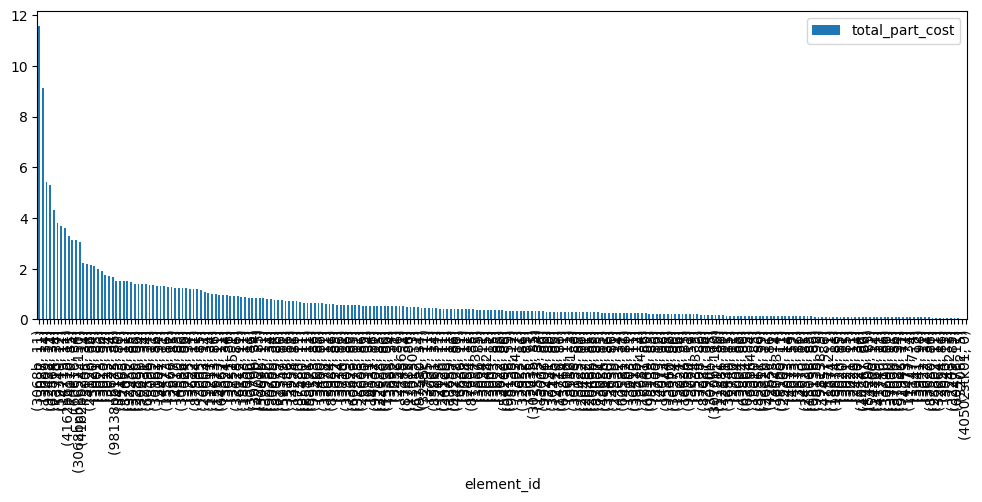

In [101]:
set_price.plot.bar(y="total_part_cost", figsize=(12,4));

In [ ]:
from collections import namedtuple

In [ ]:
Type = namedtuple('Type', ('PART', 'SET'))

In [ ]:
Type._make(('PART', 'SET'))

In [ ]:
from pybcm.const import ItemType

In [ ]:
ItemType.PART

In [ ]:
price_dict = rc.get_price_guide('3006', ItemType.PART, '1', new_or_used='N', guide_type='stock')

In [ ]:
prices = pybcm.brick_data._details_df_from_json(price_dict)
len(prices)

In [ ]:
cats = bd.get_categories()
cats.head()

In [ ]:
cats['category_name'][:10]

In [ ]:
import os
os.getcwd()

In [ ]:
partslist = r'../resources/Sampledata/Cougar_partslist.csv'
pdf = pd.read_csv(partslist, sep='\t', header=0, engine='python', na_values='', skipfooter=3, dtype={'BLItemNo':str, 'BLColorId':int, 'LDrawColorId':int, 'Qty':int})

In [ ]:
pdf.info()

In [ ]:
pdf.fillna({'BLColorId':'', 'Qty':0}).head() 

In [ ]:
(pdf['BLItemNo'] != pdf['LdrawId']).sum()

In [ ]:
pdf = pdf.rename(mapper={'BLItemNo':'item', 'BLColorId':'color'}, axis=1)
pdf = pdf.drop(columns=['ElementId', 'LdrawId', 'LDrawColorId'])

In [ ]:
pdf.head()

In [ ]:
bd.get_known_colors('3003', 'PART').head()

In [ ]:
inv = bd.rc.get_subsets('9492-1', ItemType.SET)
inv

In [ ]:
def _json_inv_to_list(inv: list)->dict:
    """
        Convert to a list of dictionaries appropriate for initiliazing a pandas DataFrame
    """
    flat_inv = []
    for item in inv:
        d = dict()
        e = item['entries'][0] # could be multiple matches, but use the first one. 
        d['item_id']     = e['item']['no']
        d['color_id']    = e['color_id']
        d['name']        = e['item']['name']
        d['itemtype']    = e['item']['type']
        d['category_id'] = e['item']['category_id']
        d['quantity']    = e['quantity']
        element_id = f"{d['item_id']}|{d['color_id']}"
        flat_inv.append(d)
    return flat_inv

In [ ]:
df = pd.DataFrame(inv_d, columns=['item_id', 'color_id', 'name', 'itemtype', 'category_id', 'quantity', ])
df[['item_id', 'color_id', 'category_id']]=df[['item_id', 'color_id', 'category_id']].astype(str)
df.info()

In [ ]:
df['element_id'] = df[['item_id', 'color_id']].apply(tuple, axis=1)
df.set_index('element_id', inplace=True)
df

In [ ]:
test_ps = bd.get_part_price_summary('2357', '86')
test_ps

In [ ]:
inv = bd.get_set_inventory('9492-1')
test_inv = inv[0:5]
test_inv

In [ ]:
test_ps.iloc[0].append(test_inv.iloc[0])

In [ ]:
def get_prices_for_row(row):
    ps = bd.get_part_price_summary(row['item_id'], row['color_id'])
    print(ps[ps['new_or_used']=='N'])
    
    
test_inv.apply(get_prices_for_row, axis=1)

In [ ]:
{'A', 'B'}.issubset(['A',]) # converts list to set implicitly

In [ ]:
price_summary = pd.DataFrame()
for index, row in inv.iterrows():
    if row['itemtype'] == ItemType.PART:
        lineitem = bd.get_part_price_summary(row['item_id'], row['color_id'], 
                                             new_or_used=[NewUsed.N,],
                                             guide_type=GuideType.stock)
        print(lineitem)
        price_summary = price_summary.append(lineitem)

price_summary

In [ ]:
new_stock = price_summary[ (price_summary['new_or_used']=='N') & (price_summary['sold_or_stock']=='stock')]

In [ ]:
new_stock['element_id'] = new_stock[['item_id', 'color_id']].apply(tuple, axis=1)
new_stock = new_stock.set_index('element_id')
new_stock = inv.merge(new_stock)
new_stock.head()

In [ ]:
new_stock['min_avg_price'] = new_stock[['avg_price', 'qty_avg_price']].min(axis=1)
new_stock['total_part_cost'] = new_stock['quantity']*new_stock['min_avg_price']
new_stock.sort_values('total_part_cost', ascending=False).head()

In [ ]:
new_stock['total_part_cost'].sum()

In [ ]:
inv.merge(price_summary)

In [16]:
def get_price_summaries(bd: BrickData, inv_df: pd.DataFrame, new_or_used=NewUsed.N, guide_type=GuideType.stock):
    """
    Get a dataframe of prices for the entire set
    :param bd:
    :param inv_df:
    :param new_or_used:
    :param guide_type:
    :return:
    """
    PARTSONLY = True

    # get price summaries for each part
    price_df = pd.DataFrame()
    for index, item in inv_df.iterrows():
        if item['itemtype'] == ItemType.PART:
            #logger.debug(f"Getting {item['item_id'], item['color_id']}")
            lineitem = bd.get_part_price_summary(str(item['item_id']), str(item['color_id']),
                                                 new_or_used=new_or_used,
                                                 guide_type=guide_type)
            price_df = price_df.append(lineitem)

    # merge prices with inventory

    return price_df

In [17]:
set_list = ['561410-1', '561408-1', '561409-1']

In [4]:
inv = bd.get_set_inventory(set_list[0])
inv

,item_id,color_id,name,itemtype,category_id,quantity
element_id,,,,,,
"(3001, 2)",3001,2,Brick 2 x 4,PART,5,1
"(3004, 71)",3004,71,Brick 1 x 2,PART,5,1
"(3035, 86)",3035,86,Plate 4 x 8,PART,26,1
"(3039, 88)",3039,88,Slope 45 2 x 2,PART,31,1
"(3040, 4)",3040,4,Slope 45 2 x 1,PART,31,2
"(3040, 71)",3040,71,Slope 45 2 x 1,PART,31,2
"(3062b, 88)",3062b,88,"Brick, Round 1 x 1 Open Stud",PART,8,2
"(3666, 89)",3666,89,Plate 1 x 6,PART,26,1
"(4073, 4)",4073,4,"Plate, Round 1 x 1 Straight Side",PART,28,2


In [19]:
summ = get_price_summaries(bd, inv)

In [6]:
from pybcm.pricing import eval_set_price, get_price_summaries, add_price_to_inv_df

In [21]:
inv.merge(summ, on=['item_id', 'color_id'])

,item_id,color_id,name,itemtype_x,category_id,quantity,itemtype_y,new_or_used,currency_code,avg_price,max_price,min_price,qty_avg_price,unit_quantity,total_quantity,sold_or_stock,region
0,3001,2,Brick 2 x 4,PART,5,1,PART,N,USD,0.2120,48.0000,0.0100,0.2267,12387,1118587,stock,north_america
1,3004,71,Brick 1 x 2,PART,5,1,PART,N,USD,0.0900,47.6240,0.0090,0.0689,19366,3618540,stock,north_america
2,3035,86,Plate 4 x 8,PART,26,1,PART,N,USD,0.3124,18.4100,0.0500,0.3413,5170,86333,stock,north_america
3,3039,88,Slope 45 2 x 2,PART,31,1,PART,N,USD,0.0693,3.6190,0.0037,0.0551,12306,887156,stock,north_america
4,3040,4,Slope 45 2 x 1,PART,31,2,PART,N,USD,0.0583,27.0000,0.0060,0.0456,14294,1231956,stock,north_america
5,3040,71,Slope 45 2 x 1,PART,31,2,PART,N,USD,0.0583,27.0000,0.0060,0.0456,14294,1231956,stock,north_america
6,3062b,88,"Brick, Round 1 x 1 Open Stud",PART,8,2,PART,N,USD,0.0674,48.0000,0.0040,0.0649,14515,1012614,stock,north_america
7,3666,89,Plate 1 x 6,PART,26,1,PART,N,USD,0.1038,5.4945,0.0100,0.1020,12308,695184,stock,north_america
8,4073,4,"Plate, Round 1 x 1 Straight Side",PART,28,2,PART,N,USD,0.0406,9.9900,0.0020,0.0294,28699,9219797,stock,north_america
9,4073,89,"Plate, Round 1 x 1 Straight Side",PART,28,2,PART,N,USD,0.0406,9.9900,0.0020,0.0294,28699,9219797,stock,north_america


In [7]:
prices = get_price_summaries(bd, inv, new_or_used='N', guide_type='stock')
prices

,item_id,itemtype,color_id,new_or_used,currency_code,avg_price,max_price,min_price,qty_avg_price,unit_quantity,total_quantity,sold_or_stock,region
0,3001,PART,2,N,USD,0.2120,48.0000,0.0100,0.2267,12387,1118587,stock,north_america
0,3004,PART,71,N,USD,0.0900,47.6240,0.0090,0.0689,19366,3618540,stock,north_america
0,3035,PART,86,N,USD,0.3124,18.4100,0.0500,0.3413,5170,86333,stock,north_america
0,3039,PART,88,N,USD,0.0693,3.6190,0.0037,0.0551,12306,887156,stock,north_america
0,3040,PART,4,N,USD,0.0583,27.0000,0.0060,0.0456,14294,1231956,stock,north_america
0,3040,PART,71,N,USD,0.0583,27.0000,0.0060,0.0456,14294,1231956,stock,north_america
0,3062b,PART,88,N,USD,0.0674,48.0000,0.0040,0.0649,14515,1012614,stock,north_america
0,3666,PART,89,N,USD,0.1038,5.4945,0.0100,0.1020,12308,695184,stock,north_america
0,4073,PART,4,N,USD,0.0406,9.9900,0.0020,0.0294,28699,9219797,stock,north_america
0,4073,PART,89,N,USD,0.0406,9.9900,0.0020,0.0294,28699,9219797,stock,north_america


In [10]:
full = inv.reset_index().merge(prices, on=['item_id', 'color_id']).set_index('element_id')
full.head(3)

,item_id,color_id,name,itemtype_x,category_id,quantity,itemtype_y,new_or_used,currency_code,avg_price,max_price,min_price,qty_avg_price,unit_quantity,total_quantity,sold_or_stock,region
element_id,,,,,,,,,,,,,,,,,
"(3001, 2)",3001,2,Brick 2 x 4,PART,5,1,PART,N,USD,0.2120,48.000,0.010,0.2267,12387,1118587,stock,north_america
"(3004, 71)",3004,71,Brick 1 x 2,PART,5,1,PART,N,USD,0.0900,47.624,0.009,0.0689,19366,3618540,stock,north_america
"(3035, 86)",3035,86,Plate 4 x 8,PART,26,1,PART,N,USD,0.3124,18.410,0.050,0.3413,5170,86333,stock,north_america


In [11]:
add_price_to_inv_df(inv, prices)

In [12]:
inv

,item_id,color_id,name,itemtype,category_id,quantity
element_id,,,,,,
"(3001, 2)",3001,2,Brick 2 x 4,PART,5,1
"(3004, 71)",3004,71,Brick 1 x 2,PART,5,1
"(3035, 86)",3035,86,Plate 4 x 8,PART,26,1
"(3039, 88)",3039,88,Slope 45 2 x 2,PART,31,1
"(3040, 4)",3040,4,Slope 45 2 x 1,PART,31,2
"(3040, 71)",3040,71,Slope 45 2 x 1,PART,31,2
"(3062b, 88)",3062b,88,"Brick, Round 1 x 1 Open Stud",PART,8,2
"(3666, 89)",3666,89,Plate 1 x 6,PART,26,1
"(4073, 4)",4073,4,"Plate, Round 1 x 1 Straight Side",PART,28,2


In [23]:
rc.get_item('561410-1', 'SET')

{'no': '561410-1',
 'name': '{Halloween Shop foil pack}',
 'type': 'SET',
 'category_id': 390,
 'image_url': '//img.bricklink.com/SL/561410-1.jpg',
 'thumbnail_url': '//img.bricklink.com/S/561410-1.jpg',
 'weight': '23.80',
 'dim_x': '12.00',
 'dim_y': '15.00',
 'dim_z': '2.00',
 'year_released': 2014,
 'description': 'Included with 2014 issue 4 of Friends magazine/comic in Poland.  Also included with an issue of the magazine in the UK.',
 'is_obsolete': False}

In [24]:
rc.get_item('3006', 'PART')

{'no': '3006',
 'name': 'Brick 2 x 10',
 'type': 'PART',
 'category_id': 5,
 'alternate_no': '92538',
 'image_url': '//img.bricklink.com/PL/3006.jpg',
 'thumbnail_url': '//img.bricklink.com/P/11/3006.jpg',
 'weight': '5.75',
 'dim_x': '2.00',
 'dim_y': '10.00',
 'dim_z': '1.00',
 'year_released': 1954,
 'is_obsolete': False}

In [118]:
import shelve

In [124]:
shelf_file = '../resources/rccache'
with shelve.open(shelf_file) as shelf:
    print(list(shelf.keys()))

['get_subsets_11910-1_SET', 'get_price_guide_2419_PART_85_N_stock_north_america', 'get_subsets_561410-1_SET', 'get_price_guide_3001_PART_2_N_stock_north_america', 'get_price_guide_2420_PART_7_N_stock_north_america', 'get_price_guide_2420_PART_86_N_stock_north_america', 'get_price_guide_2432_PART_7_N_stock_north_america', 'get_price_guide_2450_PART_85_N_stock_north_america', 'get_price_guide_2450_PART_86_N_stock_north_america', 'get_price_guide_3005_PART_7_N_stock_north_america', 'get_price_guide_3020_PART_7_N_stock_north_america', 'get_price_guide_3020_PART_85_N_stock_north_america', 'get_price_guide_3021_PART_1_N_stock_north_america', 'get_price_guide_3021_PART_3_N_stock_north_america', 'get_price_guide_3022_PART_7_N_stock_north_america', 'get_price_guide_3023_PART_11_N_stock_north_america', 'get_price_guide_3023_PART_19_N_stock_north_america', 'get_price_guide_3024_PART_7_N_stock_north_america', 'get_price_guide_3024_PART_85_N_stock_north_america', 'get_price_guide_3460_PART_86_N_sto

In [126]:
shelf.close()